# Loan Application Status Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("loan_prediction.csv")
test=pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

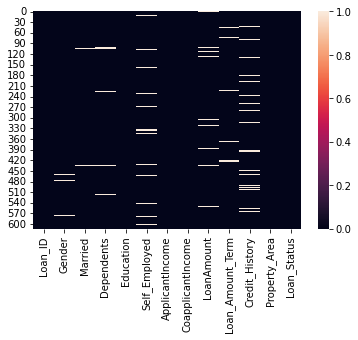

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.nunique().to_frame("No Of Unique Values")

,No Of Unique Values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


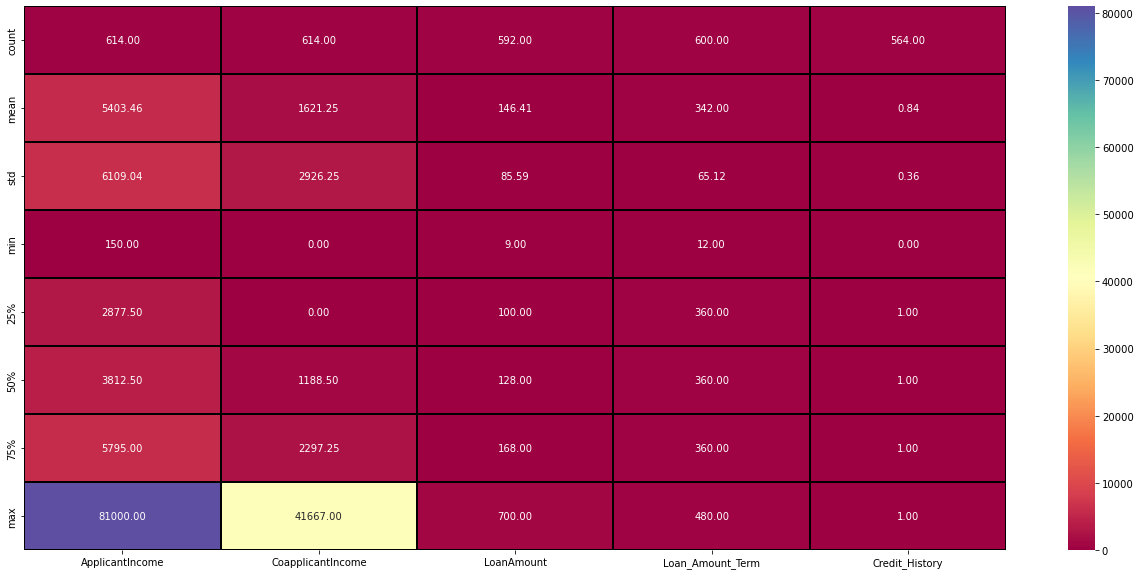

In [11]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.show()

<AxesSubplot:>

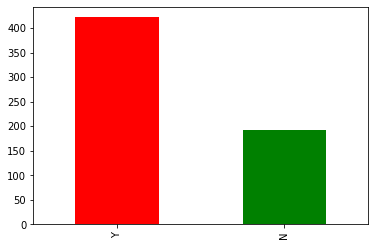

In [12]:
df["Loan_Status"].value_counts().plot.bar(color=["red","green"])

In [13]:
(df["Loan_Status"]=="Y").value_counts()

True     422
False    192
Name: Loan_Status, dtype: int64

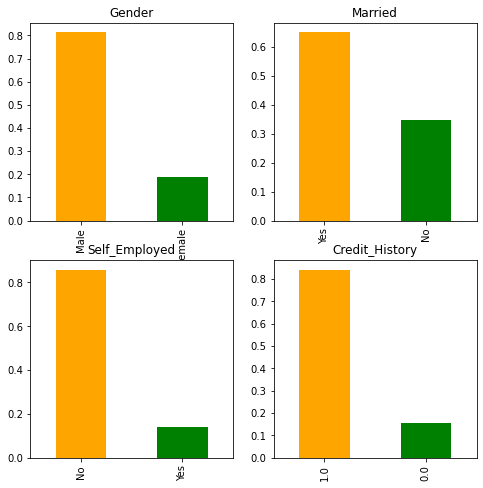

In [14]:
plt.figure(1)
plt.subplot(221)
df["Gender"].value_counts(normalize='True').plot.bar(figsize=(8,8),title="Gender",color=["orange","green"])
plt.subplot(222)
df["Married"].value_counts(normalize='True').plot.bar(figsize=(8,8),title="Married",color=["orange","green"])
plt.subplot(223)
df["Self_Employed"].value_counts(normalize='True').plot.bar(figsize=(8,8),title="Self_Employed",color=["orange","green"])
plt.subplot(224)
df["Credit_History"].value_counts(normalize='True').plot.bar(figsize=(8,8),title="Credit_History",color=["orange","green"])
plt.show()

<AxesSubplot:title={'center':'Property_Area'}>

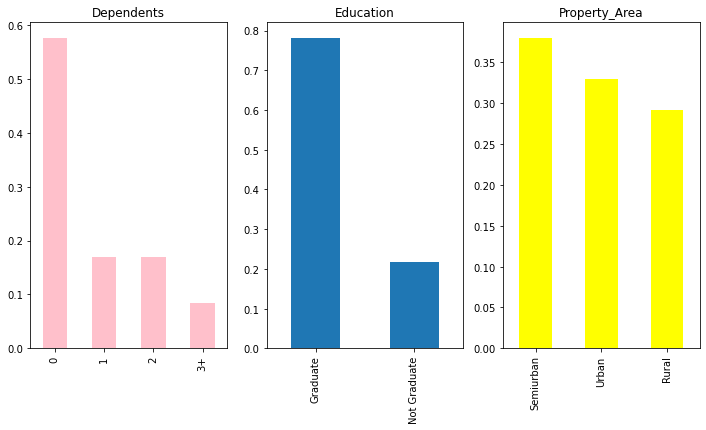

In [15]:
plt.figure(1)
plt.subplot(131)
df["Dependents"].value_counts(normalize=True).plot.bar(figsize=(12,6),color="pink",title="Dependents")
plt.subplot(132)
df["Education"].value_counts(normalize=True).plot.bar(figsize=(12,6),title="Education")
plt.subplot(133)
df["Property_Area"].value_counts(normalize=True).plot.bar(figsize=(12,6),color="yellow",title="Property_Area")

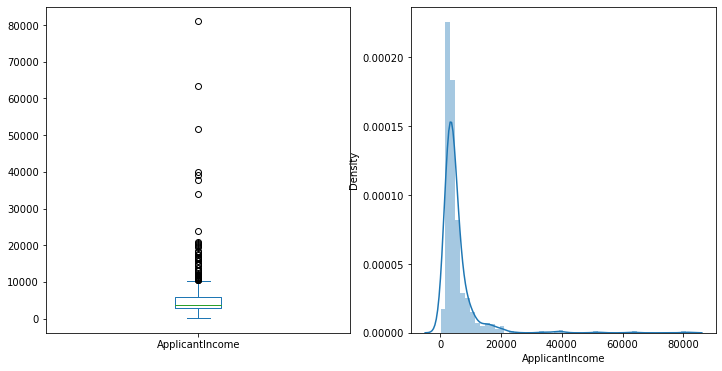

In [16]:
import seaborn as sns
plt.figure(1)
plt.subplot(121)
df["ApplicantIncome"].plot.box(figsize=(12,6))
plt.subplot(122)
sns.distplot(df["ApplicantIncome"])
plt.show()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

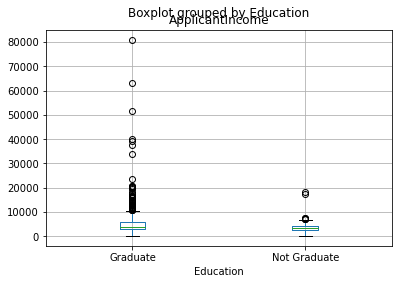

In [17]:
df.boxplot(column='ApplicantIncome', by = 'Education')

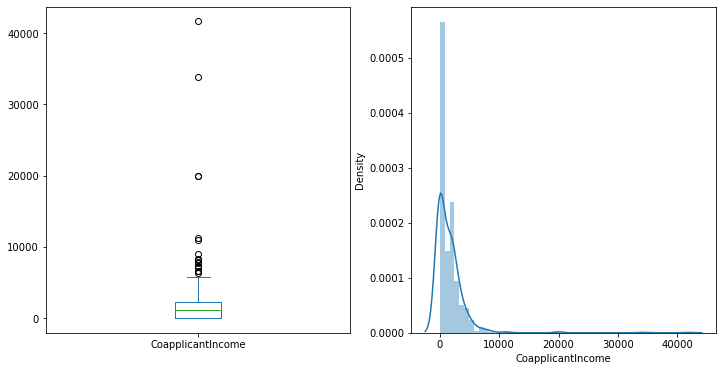

In [18]:
plt.figure(1)
plt.subplot(121)
df["CoapplicantIncome"].plot.box(figsize=(12,6))
plt.subplot(122)
sns.distplot(df["CoapplicantIncome"])
plt.show()

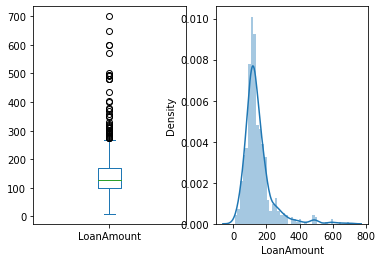

In [19]:
plt.figure(1)
plt.subplot(121)
df["LoanAmount"].plot.box()
plt.subplot(122)
sns.distplot(df["LoanAmount"])
plt.show()

<AxesSubplot:xlabel='Gender'>

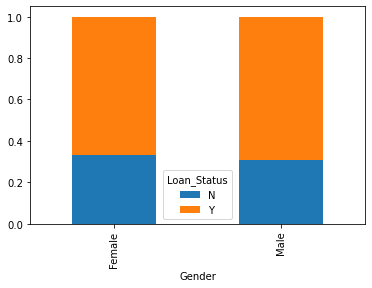

In [20]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

<AxesSubplot:xlabel='Married'>

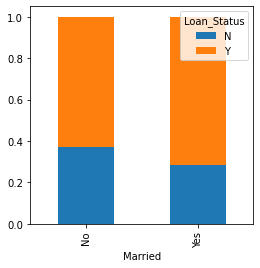

In [21]:
Married=pd.crosstab(df['Married'],df['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Self_Employed'>

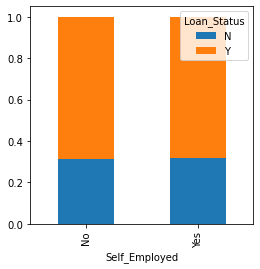

In [22]:
Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status']) 
Employed.div(Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Dependents'>

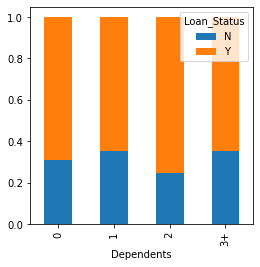

In [23]:
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status']) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Property_Area'>

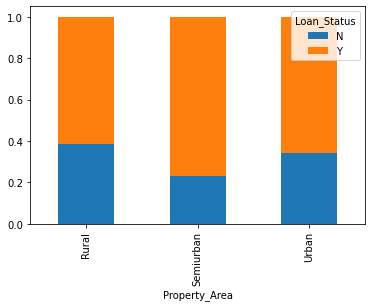

In [24]:
property_a = pd.crosstab(df["Property_Area"],df["Loan_Status"])
property_a.div(property_a.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

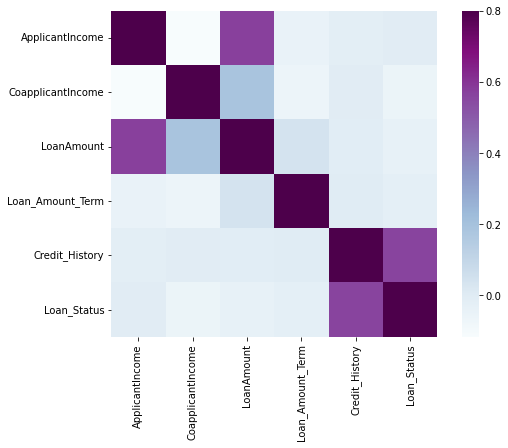

In [25]:
df['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True) 
df['Loan_Status'].replace('N', 0,inplace=True) 
df['Loan_Status'].replace('Y', 1,inplace=True)

matrix = df.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");


In [26]:
is_na = df.isna().sum()
is_na

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True) 
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True) 
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True) 
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
print(df.shape)

(614, 13)


In [28]:
df["LoanAmount"] = np.log(df['LoanAmount'])
test["LoanAmount"] = np.log(test['LoanAmount'])

In [29]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.85203,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.85203,360.0,1.0,Rural,0


In [30]:
from sklearn import preprocessing

In [31]:
df = df.drop("Loan_ID",axis=1)
test = test.drop("Loan_ID",axis=1)
print(df.shape)

(614, 12)


In [32]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
print(X.shape)
print(Y.shape)
print(X.columns)

(614, 11)
(614,)
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [33]:
X =pd.get_dummies(X) 
df=pd.get_dummies(df) 
test=pd.get_dummies(test)

In [34]:
df.shape

(614, 21)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
x_train,x_cv,y_train,y_cv = train_test_split(X,Y,test_size = 0.3) 

model = LogisticRegression()
model.fit(x_train,y_train)

predict_y = model.predict(x_cv)

acc = accuracy_score(y_cv,predict_y)

print("accuracy on cv",acc*100,'%')

accuracy on cv 82.16216216216216 %


In [37]:
from sklearn.model_selection import StratifiedKFold

In [38]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
acc=0
for train_index,test_index in kf.split(X,Y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=Y.loc[train_index],Y.loc[test_index]
    model = LogisticRegression(max_iter=150,random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    acc = acc+score
    print('accuracy_score',score)
    i+=1 
    
print("Mean accu",acc/5 *100,'%')


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8211382113821138

5 of kfold 5
accuracy_score 0.7868852459016393
Mean accu 80.77835532453686 %
